In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip -qq gdrive/My\ Drive/MP/ML.zip

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like' and 'this is what a human looks like'.
now defining each of these directories:

In [ ]:
import os

# Directory with our training Female pictures
train_Female_dir = os.path.join('/content/Male and Female face dataset/Female Faces')

# Directory with our training Male pictures
train_Male_dir = os.path.join('/content/Male and Female face dataset/Male Faces')

Now see what the filenames look like in the female and male training directories:

In [ ]:
train_Female_names = os.listdir(train_Female_dir)
print(train_Female_names[:10])

train_Male_names = os.listdir(train_Male_dir)
print(train_Male_names[:10])

['0 (59).jpg', '0 (792).jpg', '0 (423).jpg', '0 (1663).jpg', '0 (1881).jpg', '0 (2541).jpg', '0 (1295).jpg', '0 (1910).jpg', '0 (2074).jpg', '0 (2037).jpg']
['1 (743).jpg', '1 (4).jpeg', '1 (831).jpg', '1 (21).jpg', '1 (967).jpg', '1 (2609).jpg', '1 (1251).jpg', '1 (1028).jpg', '1 (2177).jpg', '1 (2444).jpg']


You can also find out the total number of female and male images in the directories:

In [ ]:
print('total training Female images:', len(os.listdir(train_Female_dir)))
print('total training Male images:', len(os.listdir(train_Male_dir)))

total training Female images: 2698
total training Male images: 2720


Now take a look at a few pictures to get a better sense of what they look like. First, configure the matplotlib parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

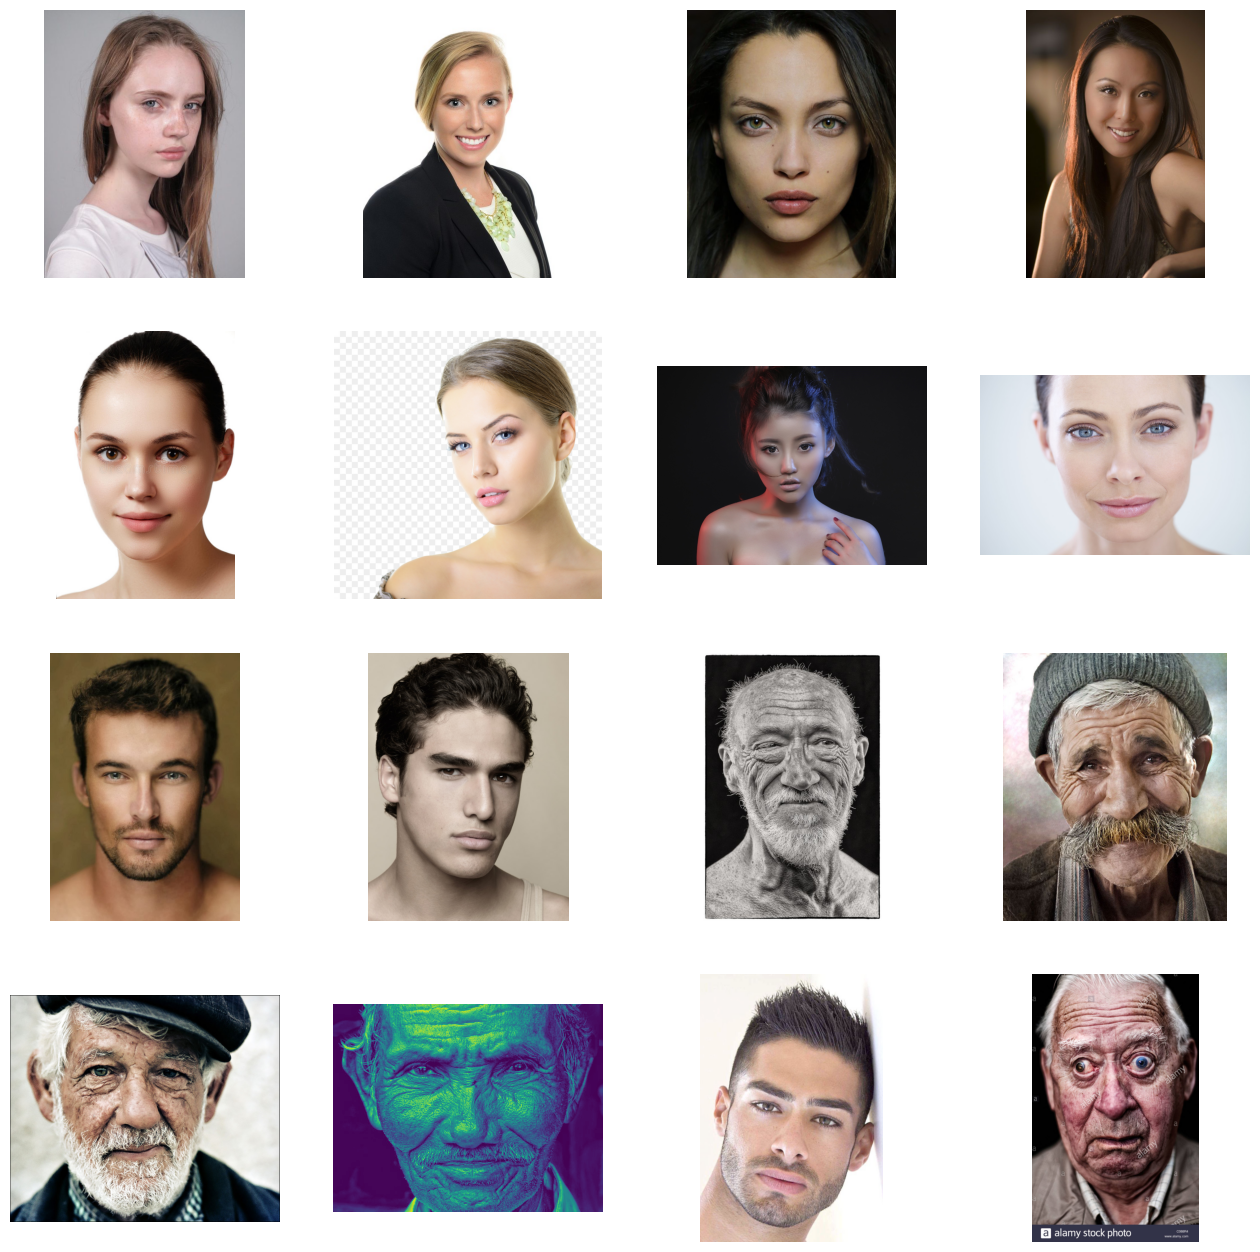

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_Female_pix = [os.path.join(train_Female_dir, fname)
                for fname in train_Female_names[pic_index-8:pic_index]]
next_Male_pix = [os.path.join(train_Male_dir, fname)
                for fname in train_Male_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_Female_pix+next_Male_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Females') and 1 for the other ('Males')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Male and Female face dataset',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 5418 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 165s 19s/step - loss: 0.6976 - accuracy: 0.5203
Epoch 2/15
6/8 [=====================>........] - ETA: 38s - loss: 0.6971 - accuracy: 0.5039

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - 163s 20s/step - loss: 0.6949 - accuracy: 0.5176
Epoch 3/15
8/8 [==============================] - 162s 19s/step - loss: 0.6898 - accuracy: 0.5020
Epoch 4/15
8/8 [==============================] - 161s 20s/step - loss: 0.7477 - accuracy: 0.5449
Epoch 5/15
8/8 [==============================] - 147s 18s/step - loss: 0.6847 - accuracy: 0.5186
Epoch 6/15
8/8 [==============================] - 147s 18s/step - loss: 0.6759 - accuracy: 0.5957
Epoch 7/15
8/8 [==============================] - 153s 19s/step - loss: 0.6667 - accuracy: 0.6094
Epoch 8/15
8/8 [==============================] - 150s 18s/step - loss: 0.6944 - accuracy: 0.5830
Epoch 9/15
8/8 [==============================] - 138s 16s/step - loss: 0.6092 - accuracy: 0.6994
Epoch 10/15
8/8 [==============================] - 154s 19s/step - loss: 0.5775 - accuracy: 0.6934
Epoch 11/15
8/8 [==============================] - 158s 19s/step - loss: 0.6761 - accuracy: 0.6602
Epoch 12/15
8/8 [============

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a Male")
  else:
    print(fn + " is a Female")

Saving 9552b66245967eca1558c08ef4f2e279.jpg to 9552b66245967eca1558c08ef4f2e279.jpg
1/1 [==============================] - 0s 87ms/step
[0.501667]
9552b66245967eca1558c08ef4f2e279.jpg is a Male
